In [ ]:
import os
job_cancel_str="scancel " + os.environ['SLURM_JOBID']
os.system(job_cancel_str)

# Imports

In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import sys, os

sys.path.append(os.path.abspath('..'))

In [22]:
# from os import chdir, scandir, makedirs
import matplotlib.pyplot as plt
# from matplotlib.gridspec import GridSpec
import seaborn as sns


from tqdm.notebook import tqdm
from glob import glob

import os

# from itertools import cycle
# from multiprocessing import Pool, cpu_count

import pandas as pd
import numpy as np
import json

In [23]:
cols = json.load(open('/storage/users/g-and-n/plates/columns.txt', 'r'))
chans = [c for c in cols.keys() if c not in ['GENERAL', 'MIXED']]
chans

del cols['GENERAL']
del cols['MIXED']

cols['ALL'] = sum(cols.values(), [])

In [24]:
from scipy.stats import pearsonr

# Load Data

In [25]:
map_files = f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/pure/err/*.csv'
raw_files = f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/pure/raw/*.csv'
raw1to1_files = f'/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/pure/raw1to1/*.csv'

In [26]:
map_df = pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(map_files)])
raw_df = pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(raw_files)])
raw1to1_df = pd.concat([pd.read_csv(pth, index_col=[0,1,2,3]) for pth in glob(raw1to1_files)])

In [27]:
map_df.shape, raw_df.shape, raw1to1_df.shape

((146599, 414), (153370, 596), (146599, 414))

In [28]:
raw_df = raw_df.loc[map_df.index, map_df.columns]

In [29]:
map_df.shape, raw_df.shape, raw1to1_df.shape

((146599, 414), (146599, 414), (146599, 414))

# Calculate Correlation

In [15]:
map_df.columns

Index(['Cells_Granularity_10_AGP', 'Cells_Granularity_11_AGP',
       'Cells_Granularity_12_AGP', 'Cells_Granularity_13_AGP',
       'Cells_Granularity_14_AGP', 'Cells_Granularity_15_AGP',
       'Cells_Granularity_16_AGP', 'Cells_Granularity_1_AGP',
       'Cells_Granularity_2_AGP', 'Cells_Granularity_3_AGP',
       ...
       'Cells_Texture_SumAverage_RNA_5_0', 'Cells_Texture_SumEntropy_RNA_10_0',
       'Cells_Texture_SumEntropy_RNA_3_0', 'Cells_Texture_SumEntropy_RNA_5_0',
       'Cells_Texture_SumVariance_RNA_10_0',
       'Cells_Texture_SumVariance_RNA_3_0',
       'Cells_Texture_SumVariance_RNA_5_0', 'Cells_Texture_Variance_RNA_10_0',
       'Cells_Texture_Variance_RNA_3_0', 'Cells_Texture_Variance_RNA_5_0'],
      dtype='object', length=414)

In [24]:
x='Cells_Granularity_10_AGP'
y='Cells_Granularity_11_AGP'

In [30]:
from itertools import combinations

In [31]:
cols_pairs = list(combinations(cols['ALL'], 2))
len(cols_pairs)

85491

In [13]:
map_df.dropna().shape

(146599, 414)

In [14]:
map_df.shape, raw_df.shape, raw1to1_df.shape

((146599, 414), (146599, 414), (146599, 414))

In [15]:
map_df.dropna().shape, raw_df.dropna().shape, raw1to1_df.dropna().shape

((146599, 414), (146599, 414), (146454, 414))

In [32]:
map_df = map_df.dropna()
raw_df = raw_df.dropna()
raw1to1_df = raw1to1_df.dropna()

In [ ]:
map_corr = []
raw_corr = []
raw1to1_corr = []
for x, y in tqdm(cols_pairs):
    idx = map_df.index.isin(['treated'], 1)
    prsnr, _ = pearsonr(map_df[idx][x], map_df[idx][y])
    map_corr.append(prsnr)
    
    idx = raw_df.index.isin(['treated'], 1)
    prsnr, _ = pearsonr(raw_df[idx][x], raw_df[idx][y])
    raw_corr.append(prsnr)
    
    idx = raw1to1_df.index.isin(['treated'], 1)
    prsnr, _ = pearsonr(raw1to1_df[idx][x], raw1to1_df[idx][y])
    raw1to1_corr.append(prsnr)

  0%|          | 0/85491 [00:00<?, ?it/s]

In [ ]:
json.dump(map_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr.json', 'w'))
json.dump(raw_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr.json', 'w'))
json.dump(raw1to1_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr.json', 'w'))

In [ ]:
map_corr = []
raw_corr = []
raw1to1_corr = []
for x, y in tqdm(cols_pairs):
    idx = map_df.index.isin(['mock'], 1)
    prsnr, _ = pearsonr(map_df[idx][x], map_df[idx][y])
    map_corr.append(prsnr)
    
    idx = raw_df.index.isin(['mock'], 1)
    prsnr, _ = pearsonr(raw_df[idx][x], raw_df[idx][y])
    raw_corr.append(prsnr)
    
    idx = raw1to1_df.index.isin(['mock'], 1)
    prsnr, _ = pearsonr(raw1to1_df[idx][x], raw1to1_df[idx][y])
    raw1to1_corr.append(prsnr)

  0%|          | 0/85491 [00:00<?, ?it/s]

In [ ]:
json.dump(map_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr_mock.json', 'w'))
json.dump(raw_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr_mock.json', 'w'))
json.dump(raw1to1_corr, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr_mock.json', 'w'))

In [ ]:
json.dump(cols_pairs, open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/cols_corr.json', 'w'))

# Load Correlation

In [9]:
cols_pairs = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/cols_corr.json', 'r'))
map_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/map_corr.json', 'r'))
raw_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw_corr.json', 'r'))
raw1to1_corr = json.load(open('/storage/users/g-and-n/tabular_models_results/30000/results/z_scores/raw1to1_corr.json', 'r'))

# Plot

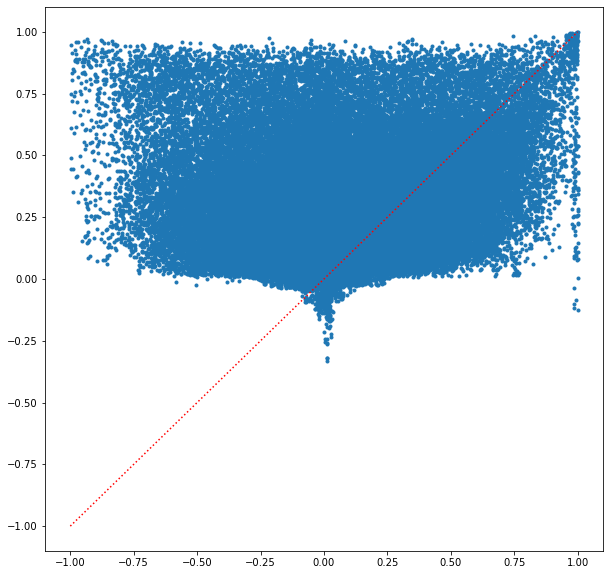

In [18]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.plot(raw_corr, map_corr, '.')
_ = ax.plot([-1,1], [-1,1], 'r:')

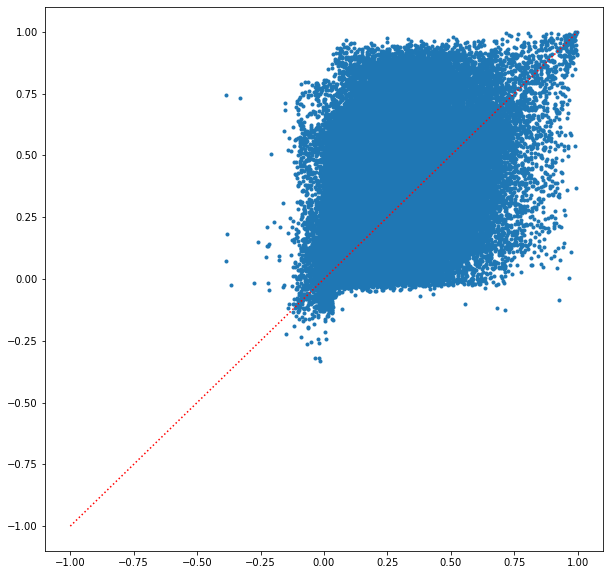

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
_ = ax.plot(raw1to1_corr, map_corr, '.')
_ = ax.plot([-1,1], [-1,1], 'r:')